In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn_alexnet_model import FcnAlexnetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn_alexnet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: default
batch_size: 2
checkpoint_dir: ./experiments\fcn_alexnet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn_alexnet_kittiroad
image_size:
- 320
- 960
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 10
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn_alexnet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (578, 320, 960, 3)
Size of masks collection :  (578, 320, 960)


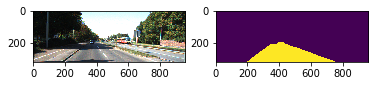

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [3]:
sess = tf.Session()
model = FcnAlexnetModel(config)
model.build()
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
model.load(sess)
trainer.train()

Model built successfully.
Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:54<00:00,  3.52s/it]


-->Last epoch loss     :  1.259451
-->Last epoch accuracy :  0.007359375
-->Last test loss      :  0.5999252
-->Last test accuracy  :  0.03409375
Saving model...
Model saved
[BEST LOST : 0.5999252200126648]
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:53<00:00,  3.49s/it]


-->Last epoch loss     :  0.59948164
-->Last epoch accuracy :  0.02284375
-->Last test loss      :  0.58428967
-->Last test accuracy  :  0.01259375
Saving model...
Model saved
[BEST LOST : 0.5842896699905396]
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:55<00:00,  3.53s/it]


-->Last epoch loss     :  0.55573034
-->Last epoch accuracy :  0.016703123
-->Last test loss      :  0.46716112
-->Last test accuracy  :  0.03084375
Saving model...
Model saved
[BEST LOST : 0.4671611189842224]
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:55<00:00,  3.62s/it]


-->Last epoch loss     :  0.5129994
-->Last epoch accuracy :  0.029296877
-->Last test loss      :  0.4429783
-->Last test accuracy  :  0.02015625
Saving model...
Model saved
[BEST LOST : 0.44297829270362854]
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:00<00:00,  3.52s/it]


-->Last epoch loss     :  0.38646477
-->Last epoch accuracy :  0.030968748
-->Last test loss      :  0.364709
-->Last test accuracy  :  0.0435625
Saving model...
Model saved
[BEST LOST : 0.3647089898586273]
Epoch  5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:49<00:00,  3.47s/it]


-->Last epoch loss     :  0.3792135
-->Last epoch accuracy :  0.049093757
-->Last test loss      :  0.37701043
-->Last test accuracy  :  0.04296875
Epoch  6


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:47<00:00,  3.45s/it]


-->Last epoch loss     :  0.3384714
-->Last epoch accuracy :  0.061015625
-->Last test loss      :  0.32686907
-->Last test accuracy  :  0.0684375
Saving model...
Model saved
[BEST LOST : 0.32686907052993774]
Epoch  7


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:45<00:00,  3.44s/it]


-->Last epoch loss     :  0.3101489
-->Last epoch accuracy :  0.086046875
-->Last test loss      :  0.27311495
-->Last test accuracy  :  0.07315625
Saving model...
Model saved
[BEST LOST : 0.273114949464798]
Epoch  8


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:45<00:00,  3.46s/it]


-->Last epoch loss     :  0.33823693
-->Last epoch accuracy :  0.10585938
-->Last test loss      :  0.38575006
-->Last test accuracy  :  0.16221875
Epoch  9


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:46<00:00,  3.46s/it]


-->Last epoch loss     :  0.29485196
-->Last epoch accuracy :  0.120828144
-->Last test loss      :  0.27296215
-->Last test accuracy  :  0.179125
Saving model...
Model saved
[BEST LOST : 0.27296215295791626]


Loading model checkpoint ./experiments\fcn_alexnet_kittiroad\checkpoint/-1000 ...

INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittiroad\checkpoint/-1000
Model loaded


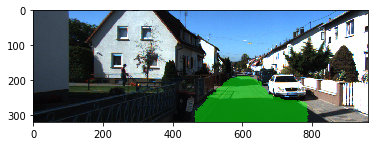

Accuracy :  0.275


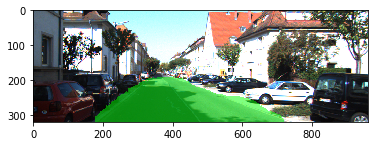

Accuracy :  0.29375


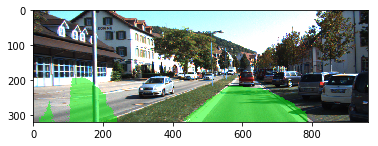

Accuracy :  0.015625


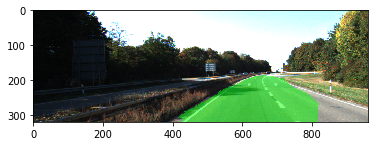

Accuracy :  0.15


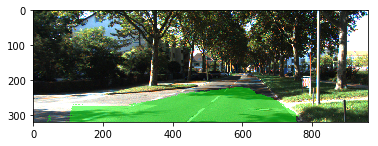

Accuracy :  0.11875


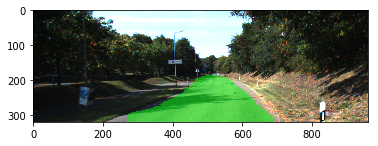

Accuracy :  0.19375


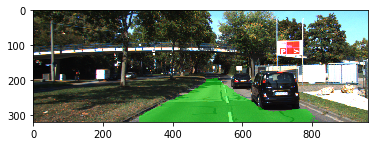

Accuracy :  0.30625


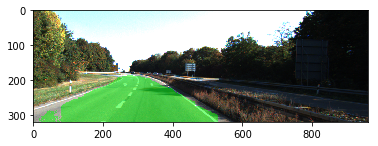

Accuracy :  0.11875


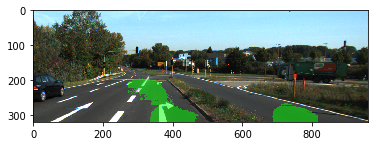

Accuracy :  0.225


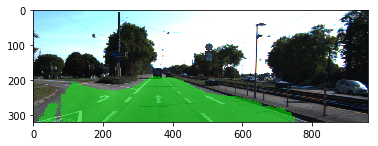

Accuracy :  0.084375


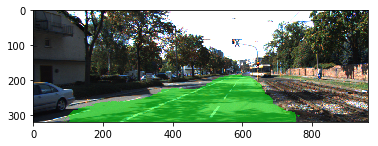

Accuracy :  0.146875


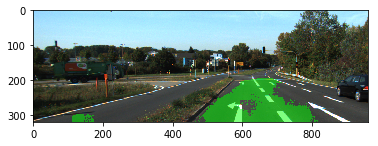

Accuracy :  0.215625


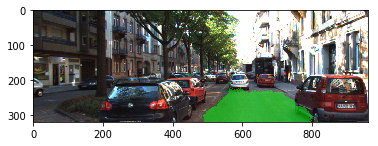

Accuracy :  0.25


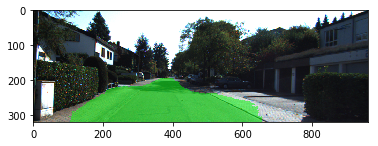

Accuracy :  0.0125


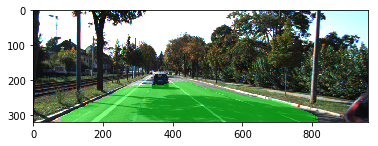

Accuracy :  0.209375


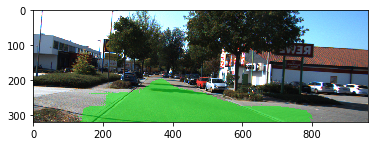

Accuracy :  0.1125


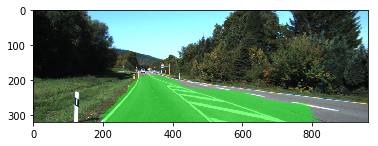

Accuracy :  0.284375


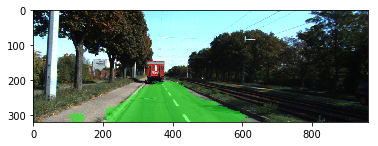

Accuracy :  0.0


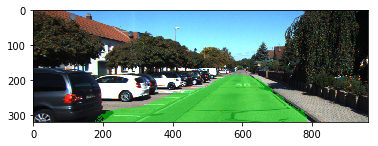

Accuracy :  0.25625


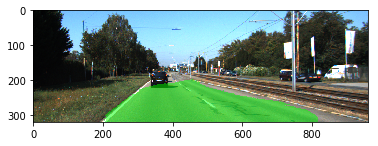

Accuracy :  0.278125


In [4]:
test = [data.get_data_element("test_data",i) for i in range(20)]
model.load(sess)
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)

In [5]:
sess.close()